<a href="https://colab.research.google.com/github/tusharchachan/EDA-2---Hotel-Booking-Analysis/blob/main/ecommerce_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E‑Commerce Analysis Notebook
Upload your CSV and continue.

In [5]:
if 'Unnamed: 22' in df.columns:
    unique_values = df['Unnamed: 22'].unique()
    print("Unique values in 'Unnamed: 22' column:")
    display(unique_values)
else:
    print("Column 'Unnamed: 22' not found in the DataFrame.")

Unique values in 'Unnamed: 22' column:


array([nan, False], dtype=object)

First, let's upload your CSV file. You can use the `files.upload()` function from `google.colab` to do this. After running the cell, a button will appear, allowing you to select and upload your file.

In [1]:
from google.colab import files
import io
import pandas as pd

# Upload the file
uploaded = files.upload()

# Assuming you upload one file, get its name
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # To read the uploaded CSV into a pandas DataFrame, you can do:
  # df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
  # display(df.head())

print("\nNow, you can proceed to load your uploaded CSV file into a pandas DataFrame. Replace 'your_uploaded_file.csv' with the name of the file you just uploaded.")

Saving sales_dataset.csv to sales_dataset.csv
User uploaded file "sales_dataset.csv" with length 67866936 bytes

Now, you can proceed to load your uploaded CSV file into a pandas DataFrame. Replace 'your_uploaded_file.csv' with the name of the file you just uploaded.


After uploading, you can load your CSV file into a pandas DataFrame like this. Make sure to replace `'your_uploaded_file.csv'` with the actual filename.

In [6]:
import pandas as pd

# Replace 'your_uploaded_file.csv' with the actual name of your uploaded CSV file
# For example, if you uploaded 'ecommerce_data.csv', use that name.
file_name = 'sales_dataset.csv'

try:
    df = pd.read_csv("sales_dataset.csv")
    print(f"Successfully loaded '{file_name}' into a DataFrame.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please ensure you uploaded the correct file and specified its name correctly.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully loaded 'sales_dataset.csv' into a DataFrame.


/tmp/ipython-input-2660615149.py:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sales_dataset.csv")


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime


sns.set(style='whitegrid')

In [20]:
DATA_PATH = 'sales_dataset.csv' # <-- change if needed
DATE_COL = 'Date' # column in your dataset that contains date
AMOUNT_COL = 'Amount' # monetary column to clean
QUANTITY_COL = 'Qty' # quantity column name - Corrected from 'Quantity'
ORDER_ID_COL = 'Order ID'
STATUS_COL = 'Status'
FULFILLMENT_COL = 'Fulfillment'
B2B_COL = 'B2B'
CATEGORY_COL = 'Category'
SHIP_TIME_COL = 'ship_date'

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime

def load_data(path='sales_dataset.csv'):
    # ## 4. Data cleaning
    # Steps:
    # - Normalize column names (strip/replace spaces)
    # - Convert Amount to numeric and replace nulls with median
    # - Ensure Quantity is numeric
    # - Parse date column
    # - Create derived columns: year, month, day, month_year

    try:
        df_local = pd.read_csv(path)
        print(f"Successfully loaded '{path}' into a DataFrame within the function.")
    except FileNotFoundError:
        print(f"Error: The file '{path}' was not found. Please ensure the path is correct.")
        return pd.DataFrame() # Return empty DataFrame on error
    except Exception as e:
        print(f"An error occurred while reading the CSV file: {e}")
        return pd.DataFrame() # Return empty DataFrame on error

    # Normalize column names
    df_local.columns = [c.strip() for c in df_local.columns]

    # Ensure date parsing
    if DATE_COL in df_local.columns and not df_local[DATE_COL].isnull().all():
        # Specify date format to avoid UserWarning: Could not infer format
        df_local[DATE_COL] = pd.to_datetime(df_local[DATE_COL], errors='coerce', format='%m-%d-%y') # Assuming MM-DD-YY format
        df_local['order_year'] = df_local[DATE_COL].dt.year
        df_local['order_month'] = df_local[DATE_COL].dt.month
        df_local['order_month_name'] = df_local[DATE_COL].dt.strftime('%b')
        df_local['order_month_year'] = df_local[DATE_COL].dt.to_period('M')
    else:
        print(f"Warning: '{DATE_COL}' column not found or contains only null values. Date processing skipped.")

    # Amount cleaning
    if AMOUNT_COL in df_local.columns:
        # Use raw string for regex to avoid SyntaxWarning: invalid escape sequence
        df_local[AMOUNT_COL] = df_local[AMOUNT_COL].astype(str).replace(r'[^0-9.\-]', '', regex=True)
        df_local[AMOUNT_COL] = pd.to_numeric(df_local[AMOUNT_COL], errors='coerce')
        median_amount = df_local[AMOUNT_COL].median()
        # Avoid inplace=True with chained assignment to prevent FutureWarning
        df_local[AMOUNT_COL] = df_local[AMOUNT_COL].fillna(median_amount)
        print(f'Filled missing {AMOUNT_COL} with median: {median_amount}')
    else:
        print(f"Warning: '{AMOUNT_COL}' column not found. Amount cleaning skipped.")

    # Quantity cleaning
    actual_quantity_col = None
    if 'Qty' in df_local.columns:
        actual_quantity_col = 'Qty'
    elif QUANTITY_COL in df_local.columns: # Fallback to QUANTITY_COL if 'Qty' not found
        actual_quantity_col = QUANTITY_COL

    if actual_quantity_col:
        df_local[actual_quantity_col] = pd.to_numeric(df_local[actual_quantity_col], errors='coerce').fillna(1).astype(int)
    else:
        print(f"Warning: Neither 'Qty' nor '{QUANTITY_COL}' column found. Quantity cleaning skipped.")

    # B2B to boolean
    if B2B_COL in df_local.columns:
        df_local[B2B_COL] = df_local[B2B_COL].astype(str).str.lower().isin(['true','1','yes','y','t'])
    else:
        print(f"Warning: '{B2B_COL}' column not found. B2B conversion skipped.")

    # Create revenue column if not exactly Amount
    if AMOUNT_COL in df_local.columns:
        df_local['revenue'] = df_local[AMOUNT_COL]
    else:
        print("Warning: Cannot create 'revenue' column as 'Amount' column is missing.")
        df_local['revenue'] = np.nan # Assign NaN or handle appropriately

    # Drop rows without order id or date if many
    before = len(df_local)
    if ORDER_ID_COL in df_local.columns:
        df_local = df_local[~df_local[ORDER_ID_COL].isnull()]
    else:
        print(f"Warning: '{ORDER_ID_COL}' column not found for dropping null order ids.")
    after = len(df_local)
    print(f'Dropped {before-after} rows with null order id (if any).')

    return df_local

# Call the function to load and clean the data, then assign to the global df
df = load_data(DATA_PATH)

# %% [markdown]
# ## 5. Financial Performance Analysis
# - Total revenue over time
# - Best-selling products / SKUs
# - Average order value (AOV)

# %%
if not df.empty:
    # Total revenue by month
    revenue_month = df.groupby('order_month_year')['revenue'].sum().sort_index()
    revenue_month = revenue_month.astype(float)
    display(revenue_month.head())
else:
    print("DataFrame is empty, skipping financial performance analysis.")

/tmp/ipython-input-3844374336.py:15: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_local = pd.read_csv(path)


Successfully loaded 'sales_dataset.csv' into a DataFrame within the function.
Filled missing Amount with median: 605.0
Dropped 0 rows with null order id (if any).


,revenue
order_month_year,
2022-03,107128.85
2022-04,18638548.20
2022-05,15794081.07
2022-06,13256583.36


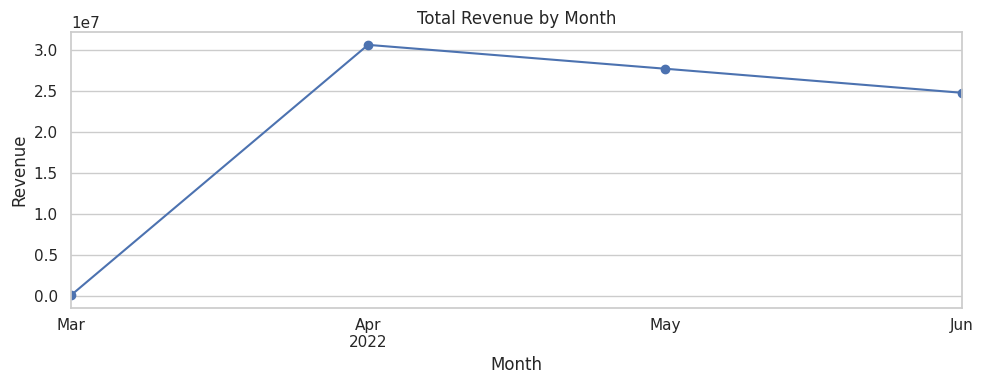

In [15]:
# Plot revenue over time
plt.figure(figsize=(10,4))
revenue_month.plot(marker='o')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [21]:
# Best selling SKUs by revenue and by quantity
if 'SKU' in df.columns:
top_skus_revenue = df.groupby('SKU')['revenue'].sum().sort_values(ascending=False).head(10)
top_skus_qty = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
print('\nTop 10 SKUs by revenue:')
display(top_skus_revenue)
print('\nTop 10 SKUs by quantity sold:')
display(top_skus_qty)

IndentationError: expected an indented block after 'if' statement on line 2 (ipython-input-560519666.py, line 3)

In [22]:
# Average Order Value
aov = df.groupby(ORDER_ID_COL)['revenue'].sum().mean() if ORDER_ID_COL in df.columns else df['revenue'].mean()
print(f'Average Order Value (AOV): {aov:,.2f}')

Average Order Value (AOV): 692.06


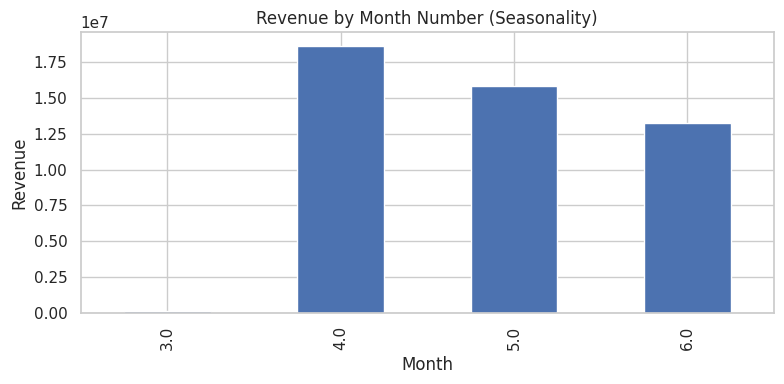

In [56]:
# Seasonal trends (monthly average revenue)
monthly_avg = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(8,4))
monthly_avg.plot(kind='bar')
plt.title('Revenue by Month Number (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [26]:
# ## 6. Customer Insights
# - Top locations
# - Cancellation trend
# - B2B vs B2C behavior


# %%
if not df.empty:
    # Top cities / states
    if 'ship-city' in df.columns:
        top_cities = df.groupby('ship-city')['revenue'].sum().sort_values(ascending=False).head(10)
        print('Top ship-cities by revenue:')
        display(top_cities)


    if 'ship-state' in df.columns:
        top_states = df.groupby('ship-state')['revenue'].sum().sort_values(ascending=False).head(10)
        print('Top ship-states by revenue:')
        display(top_states)
else:
    print("DataFrame is empty, skipping customer insights analysis.")

Top ship-cities by revenue:


,revenue
ship-city,
BENGALURU,7168345.99
HYDERABAD,5227277.82
MUMBAI,3859728.80
NEW DELHI,3821817.78
CHENNAI,3273076.74
PUNE,2458668.18
KOLKATA,1497258.87
GURUGRAM,1272493.74
THANE,1061225.29


Top ship-states by revenue:


,revenue
ship-state,
MAHARASHTRA,14051391.14
KARNATAKA,11041795.37
TELANGANA,7333985.65
UTTAR PRADESH,7232467.08
TAMIL NADU,6921696.11
DELHI,4469778.97
KERALA,4092797.58
WEST BENGAL,3758705.44
ANDHRA PRADESH,3446162.72


### Cancellation Trends
Let's analyze the trend of cancelled orders over time. We'll count cancellations per month and visualize it.

Monthly Cancellation Counts:


,0
order_month_year,
2022-03,18
2022-04,4394
2022-05,3209
2022-06,2837


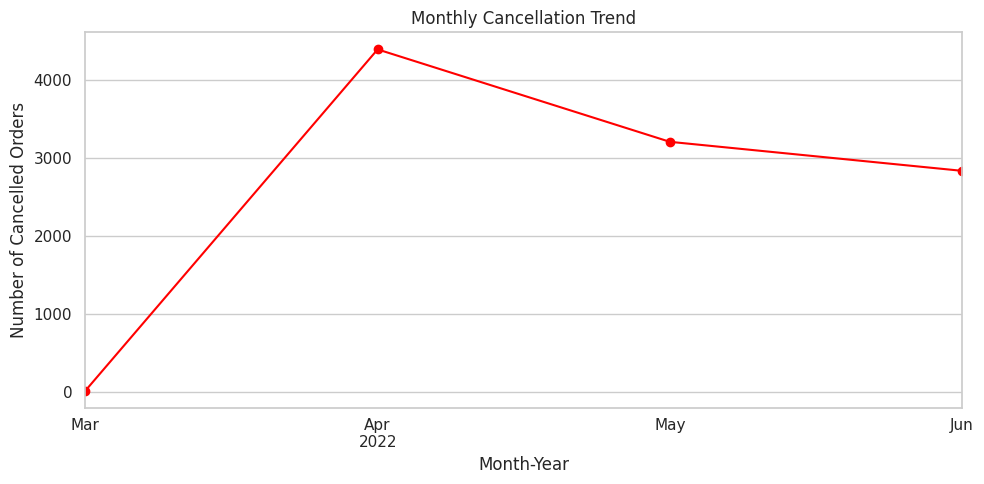

In [27]:
if not df.empty and STATUS_COL in df.columns and 'order_month_year' in df.columns:
    # Filter for cancelled orders
    cancelled_orders = df[df[STATUS_COL] == 'Cancelled']

    # Group by month and count cancellations
    cancellations_by_month = cancelled_orders.groupby('order_month_year').size()

    print('Monthly Cancellation Counts:')
    display(cancellations_by_month)

    # Plot the cancellation trend
    plt.figure(figsize=(10, 5))
    cancellations_by_month.plot(kind='line', marker='o', color='red')
    plt.title('Monthly Cancellation Trend')
    plt.xlabel('Month-Year')
    plt.ylabel('Number of Cancelled Orders')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
elif df.empty:
    print("DataFrame is empty, cannot analyze cancellation trends.")
else:
    print(f"Required columns ('{STATUS_COL}' or 'order_month_year') not found for cancellation analysis.")

In [30]:
# B2B vs B2C
if B2B_COL in df.columns:
    b2b_summary = df.groupby(B2B_COL)['revenue'].agg(['sum','count','mean'])
    print('\nB2B vs B2C revenue summary:')
    display(b2b_summary)


B2B vs B2C revenue summary:


,sum,count,mean
B2B,,,
False,82682382.15,128078,645.562721
True,608160.79,871,698.232824


### Cancellations by Product Category
Let's examine which product categories experience the most cancellations. This can highlight potential issues with specific product lines.

Cancellation Counts by Product Category:


,0
Category,
Set,7338
kurta,7259
Western Dress,2125
Top,1276
Ethnic Dress,146
Blouse,116
Bottom,60
Saree,21


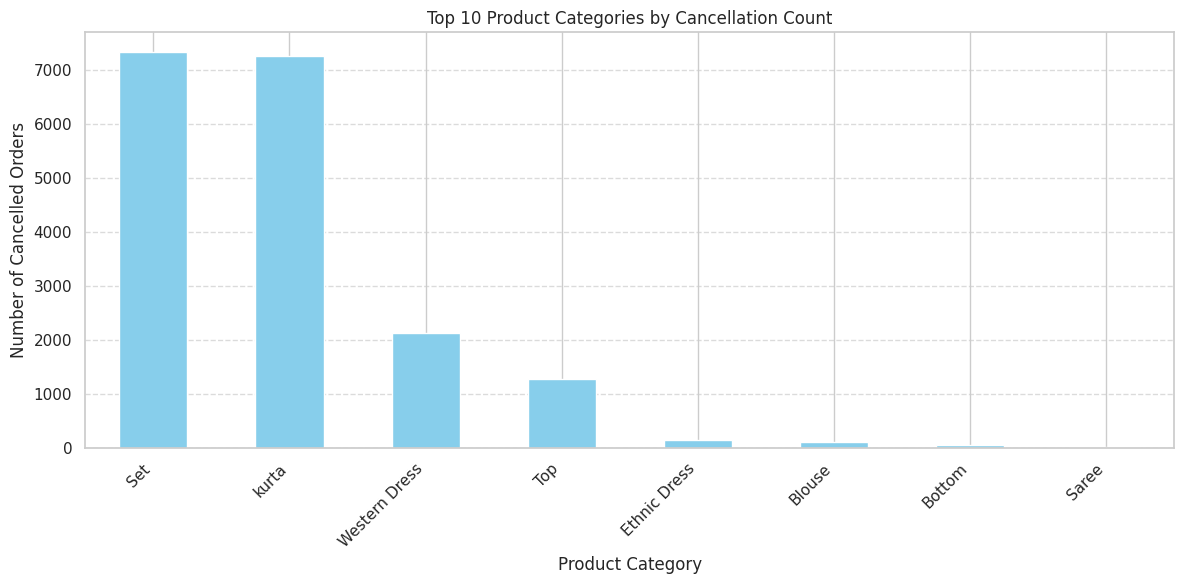

In [32]:
if not df.empty and STATUS_COL in df.columns and CATEGORY_COL in df.columns:
    # Filter for cancelled orders
    cancelled_orders = df[df[STATUS_COL] == 'Cancelled']

    # Group by Category and count cancellations
    cancellations_by_category = cancelled_orders.groupby(CATEGORY_COL).size().sort_values(ascending=False)

    print('Cancellation Counts by Product Category:')
    display(cancellations_by_category)

    # Optional: Plot top N cancelled categories
    plt.figure(figsize=(12, 6))
    cancellations_by_category.head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Product Categories by Cancellation Count')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Cancelled Orders')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
elif df.empty:
    print("DataFrame is empty, cannot analyze cancellations by category.")
else:
    print(f"Required columns ('{STATUS_COL}' or '{CATEGORY_COL}') not found for cancellation analysis.")

In [38]:
# ## 8. Product Management & Inventory
# - High demand categories
# - Average quantity ordered per category


# %%
if not df.empty and CATEGORY_COL in df.columns:
    cat_rev = df.groupby(CATEGORY_COL)['revenue'].agg(['sum','count']).sort_values('sum', ascending=False)
    print('\nTop categories by revenue:')
    display(cat_rev.head(10))


    avg_qty_by_cat = df.groupby(CATEGORY_COL)[QUANTITY_COL].mean().sort_values(ascending=False)
    print('\nAverage quantity per order by category:')
    display(avg_qty_by_cat.head(10))
else:
    print("DataFrame is empty or 'Category' column not found, skipping product management analysis.")


Top categories by revenue:


,sum,count
Category,,
Set,41157496.67,50275
kurta,23206327.70,49867
Western Dress,11694003.69,15495
Top,5623727.30,10621
Ethnic Dress,830292.66,1158
Blouse,485633.18,926
Bottom,162767.98,440
Saree,129378.76,164
Dupatta,915.00,3



Average quantity per order by category:


,Qty
Category,
Dupatta,1.000000
Blouse,0.933045
Top,0.932304
Saree,0.926829
Ethnic Dress,0.908463
Bottom,0.904545
kurta,0.903383
Set,0.900806
Western Dress,0.899839


In [40]:
# ## 9. Customer Satisfaction & Returns
# - If returns/cancellation flags exist, analyze


# %%
if not df.empty:
    # Look for common return columns
    return_cols = [c for c in df.columns if 'return' in c.lower() or 'cancel' in c.lower()]
    print('\nPotential columns related to returns/cancellations:', return_cols)


    # If there's a 'Returned' or similar status
    if STATUS_COL in df.columns:
        returned_count = df[STATUS_COL].str.contains('Return|Returned|Refund', case=False, na=False).sum()
        print(f'Returned/refunded orders (by status text search): {returned_count}')


    # Identify problematic products with high cancellation/return share
    if 'SKU' in df.columns and STATUS_COL in df.columns:
        sku_problem = df[df[STATUS_COL].str.contains('Return|Refund|Cancelled', case=False, na=False)].groupby('SKU').size().sort_values(ascending=False).head(10)
        print('\nTop SKUs with returns/cancellations:')
        display(sku_problem)
else:
    print("DataFrame is empty, skipping customer satisfaction and returns analysis.")


Potential columns related to returns/cancellations: []
Returned/refunded orders (by status text search): 2098

Top SKUs with returns/cancellations:


,0
SKU,
JNE3797-KR-L,152
JNE3797-KR-M,125
JNE3797-KR-S,122
JNE3405-KR-L,88
JNE3797-KR-XL,85
JNE3405-KR-M,76
JNE3797-KR-XS,76
J0230-SKD-M,75
J0003-SET-S,74


In [42]:
# ## 10. Save cleaned dataset and summary outputs (optional)


# %%
OUTPUT_CLEAN = '/content/data_cleaned.csv'
if not df.empty:
    df.to_csv(OUTPUT_CLEAN, index=False)
    print(f'Cleaned dataset saved to {OUTPUT_CLEAN}')

Cleaned dataset saved to /content/data_cleaned.csv


In [45]:
# ## 11. Multiple Choice Questions (MCQs) to test understanding
# We'll generate a few MCQs based on the dataset computed metrics so you can include them in your exam.


# %%
mcqs = []
if not df.empty:
    total_revenue = df['revenue'].sum()
    top_category = df.groupby(CATEGORY_COL)['revenue'].sum().idxmax() if CATEGORY_COL in df.columns else None
    top_city = df.groupby('ship-city')['revenue'].sum().idxmax() if 'ship-city' in df.columns else None
    mcqs.append({
    'q': 'Which month had the highest total revenue (by month-year)?',
    'options': list(revenue_month.sort_values(ascending=False).head(4).index.astype(str)),
    'answer': str(revenue_month.idxmax())
    })
    mcqs.append({
    'q': 'What is the Average Order Value (AOV) rounded to nearest integer?',
    'options': [round(aov), round(aov*0.9), round(aov*1.1), round(aov*1.2)],
    'answer': round(aov)
    })
    if top_category is not None:
        mcqs.append({
        'q': 'Which category generated the most revenue?',
        'options': list(cat_rev.head(4).index.astype(str)),
        'answer': str(top_category)
        })


print('\nSample MCQs (you can paste these into your exam):')
for i, m in enumerate(mcqs,1):
    print(f"\n{i}. {m['q']}")
    for j,opt in enumerate(m['options'],1):
        print(f" {chr(64+j)}. {opt}")
    print(f" Answer: {m['answer']}")


Sample MCQs (you can paste these into your exam):

1. Which month had the highest total revenue (by month-year)?
 A. 2022-04
 B. 2022-05
 C. 2022-06
 D. 2022-03
 Answer: 2022-04

2. What is the Average Order Value (AOV) rounded to nearest integer?
 A. 692
 B. 623
 C. 761
 D. 830
 Answer: 692

3. Which category generated the most revenue?
 A. Set
 B. kurta
 C. Western Dress
 D. Top
 Answer: Set


In [50]:
# ## 12. Recommendations & Conclusion (auto-generated from analysis)


# %%
recommendations = []
if not df.empty:
    # Financial
    recommendations.append('Focus promotions and inventory on the top categories and SKUs identified to maximize revenue and reduce carrying cost.')
    recommendations.append('Use the monthly revenue trend to plan marketing spend before peak months to capture demand and avoid stockouts.')


    # Customer
    recommendations.append('Target retention campaigns in top ship-cities and states; consider localized promotions and faster shipping options for these regions.')
    recommendations.append('Analyze cancellation reasons (product, delivery, pricing) and improve policy or product detail pages to lower cancellation rate.')


    # Logistics
    recommendations.append('If shipping_days is high, partner with additional fulfillment centers or optimize routing to reduce average shipping time.')
    recommendations.append('Compare fulfillment partners (Amazon vs Merchant) by on-time and return rates and move more volume to consistently better performers.')


    # Product / Inventory
    recommendations.append('Keep safety stock for SKUs with high sales velocity; consider dynamic reorder point calculations using lead time and demand variance.')


    # Customer satisfaction
    recommendations.append('Investigate SKUs with high return or cancellation counts for quality issues and update product descriptions with clearer images/specs.')


    # Print recommendations
    print('\nRecommendations:')
    for r in recommendations:
        print('- ' + r)


    conclusion = (
    'By cleaning and analyzing order-level data we can prioritize high-impact interventions: focus on top categories/SKUs, ' \
    'improve shipping/fulfillment performance, and reduce cancellations through better product information and targeted retention. ' \
    'Continuous monitoring of AOV, revenue by location, and fulfillment metrics will help sustain growth.'
    )
    print('\nConclusion:')
    print(conclusion)
else:
    print("DataFrame is empty, skipping recommendations and conclusion generation.")


Recommendations:
- Focus promotions and inventory on the top categories and SKUs identified to maximize revenue and reduce carrying cost.
- Use the monthly revenue trend to plan marketing spend before peak months to capture demand and avoid stockouts.
- Target retention campaigns in top ship-cities and states; consider localized promotions and faster shipping options for these regions.
- Analyze cancellation reasons (product, delivery, pricing) and improve policy or product detail pages to lower cancellation rate.
- If shipping_days is high, partner with additional fulfillment centers or optimize routing to reduce average shipping time.
- Compare fulfillment partners (Amazon vs Merchant) by on-time and return rates and move more volume to consistently better performers.
- Keep safety stock for SKUs with high sales velocity; consider dynamic reorder point calculations using lead time and demand variance.
- Investigate SKUs with high return or cancellation counts for quality issues and 

In [51]:
13. Export results: PDF/Report (optional)
# You can expand this section to programmatically create a PDF or PowerPoint summarizing charts and tables.


# %%
print('\nScript finished. — You can now review saved outputs and charts.')

SyntaxError: invalid syntax (ipython-input-4214398829.py, line 1)

### Revenue by Product Category
Visualizing the total revenue generated by each product category to identify the highest performing ones.

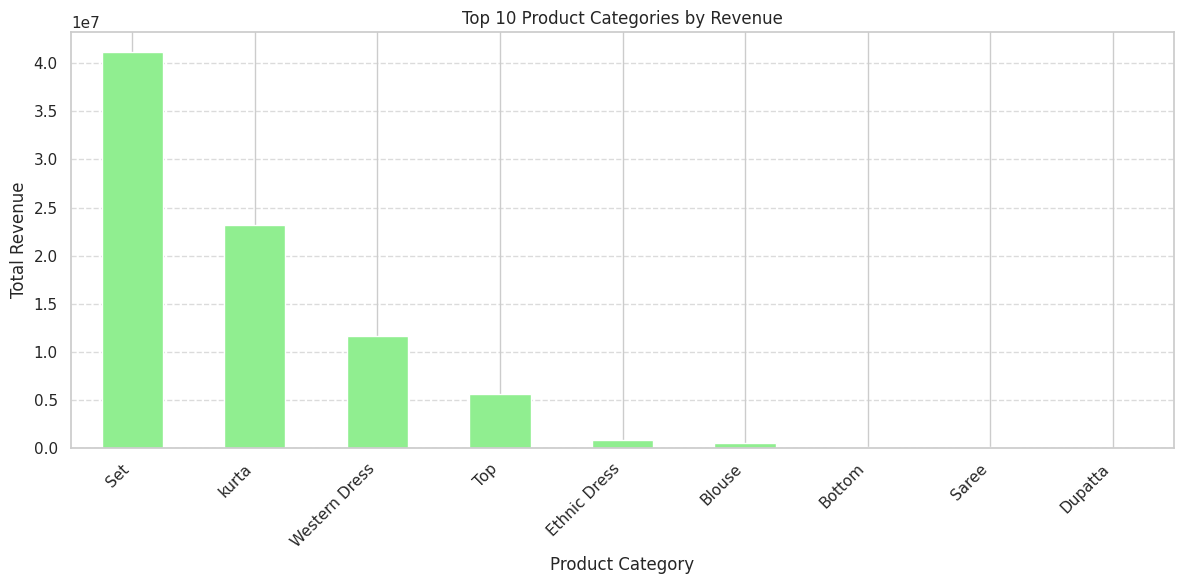

In [52]:
if not df.empty and 'cat_rev' in globals():
    plt.figure(figsize=(12, 6))
    cat_rev['sum'].head(10).plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Product Categories by Revenue')
    plt.xlabel('Product Category')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
elif df.empty:
    print("DataFrame is empty, cannot visualize revenue by category.")
else:
    print("The 'cat_rev' variable was not found. Please ensure the 'Product Management & Inventory' analysis cell has been run.")

In [1]:
# ## 13. Export results: PDF/Report (optional)
# You can expand this section to programmatically create a PDF or PowerPoint summarizing charts and tables.


# %%
print('\nScript finished. — You can now review saved outputs and charts.')


Script finished. — You can now review saved outputs and charts.
